In [1]:
# Python ≥3.5 is required
import sys
# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import os


In [2]:
from google.colab import files
uploaded = files.upload()


Saving gender_submission.csv to gender_submission (3).csv
Saving test.csv to test (4).csv
Saving train.csv to train (4).csv


In [3]:
df = pd.read_csv('train.csv')
df.head() #read train csv file using pandas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:

test=pd.read_csv('test.csv')
test.head() #read test csv file using pandas

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.Sex=df.Sex.astype('category').cat.codes


In [6]:
test.Sex=test.Sex.astype('category').cat.codes

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df=df.copy()
test_df=test.copy()
train_df = pd.get_dummies(train_df, columns=['Embarked', 'Pclass'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked', 'Pclass'], drop_first=True)

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int8   
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
 12  Pclass_2     891 non-null    uint8  
 13  Pclass_3     891 non-null    uint8  
dtypes: float64(2), int64(4), int8(1), object(3), uint8(4)
memory usage: 67.1+ KB


In [12]:
test_df.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0,1,0,1
2,894,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,0,1,0
3,895,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0,1,0,1


In [13]:
mean_age=train_df.Age.mean()

In [14]:
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)

In [15]:
train_df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,1,0,0
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1,0,1


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int8   
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
 12  Pclass_2     891 non-null    uint8  
 13  Pclass_3     891 non-null    uint8  
dtypes: float64(2), int64(4), int8(1), object(3), uint8(4)
memory usage: 67.1+ KB


In [17]:
mean_age_test=test_df['Age'].mean()

In [18]:
print(mean_age_test)

30.272590361445783


In [19]:
test_df['Age'].fillna(test_df['Age'].mean(),inplace=True)

In [20]:
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)

In [21]:
test_df.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [22]:
test_df.drop(columns=['Cabin','Name','Ticket'],axis=1,inplace=True)

In [23]:
train_df.drop(columns=['Cabin','Name','Ticket'],axis=1,inplace=True)

In [24]:
train_df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Sex  ...  Embarked_S  Pclass_2  Pclass_3
0              1         0    1  ...           1         0         1
1              2         1    0  ...           0         0         0
2              3         1    0  ...           1         0         1
3              4         1    0  ...           1         0         0
4              5         0    1  ...           1         0         1
..           ...       ...  ...  ...         ...       ...       ...
886          887         0    1  ...           1         1         0
887          888         1    0  ...           1         0         0
888          889         0    0  ...           1         0         1
889          890         1    1  ...           0         0         0
890          891         0    1  ...           0         0         1

[891 rows x 11 columns]>

In [25]:
corr = train_df.corr(method='pearson')
corr

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
PassengerId,1.000000,-0.005007,0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.033606,0.022148,-0.000086,-0.029486
Survived,-0.005007,1.000000,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.003650,-0.155660,0.093349,-0.322308
Sex,0.042939,-0.543351,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.074115,0.125722,-0.064746,0.137143
Age,0.034212,-0.064910,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.031415,-0.014665,0.015831,-0.291955
SibSp,-0.057527,-0.035322,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.026354,0.070941,-0.055932,0.092548
Parch,-0.001652,0.081629,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.081228,0.063036,-0.000734,0.015790
Fare,0.012658,0.257307,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.117216,-0.166603,-0.118557,-0.413333
Embarked_Q,-0.033606,0.003650,-0.074115,-0.031415,-0.026354,-0.081228,-0.117216,1.000000,-0.496624,-0.127301,0.237449
Embarked_S,0.022148,-0.155660,0.125722,-0.014665,0.070941,0.063036,-0.166603,-0.496624,1.000000,0.192061,-0.009511
Pclass_2,-0.000086,0.093349,-0.064746,0.015831,-0.055932,-0.000734,-0.118557,-0.127301,0.192061,1.000000,-0.565210


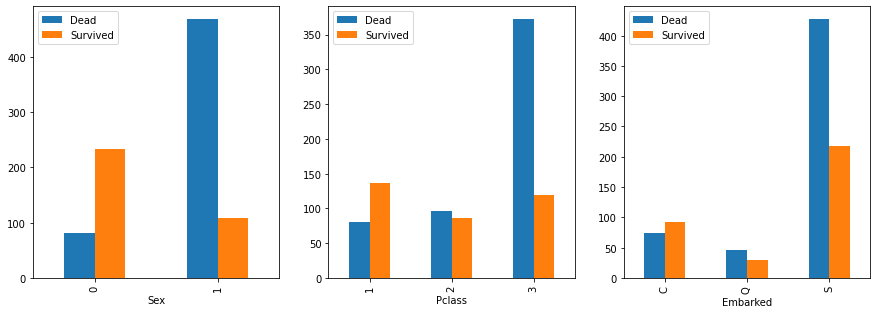

In [26]:
 import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
cat_columns = ['Sex','Pclass','Embarked']
for i in range(len(cat_columns)):
    curr_feature = cat_columns[i]
    df.groupby([curr_feature, 'Survived'])['PassengerId'].count().unstack().plot(kind = 'bar', stacked = False, ax = axes[i])
    axes[i].legend(['Dead','Survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


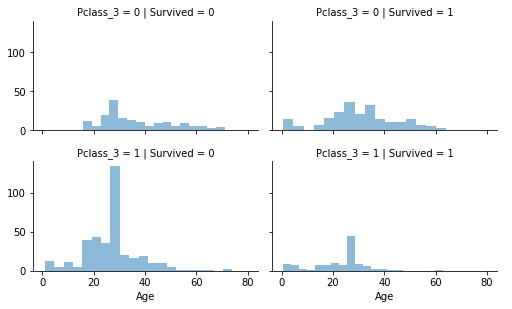

In [27]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass_3', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

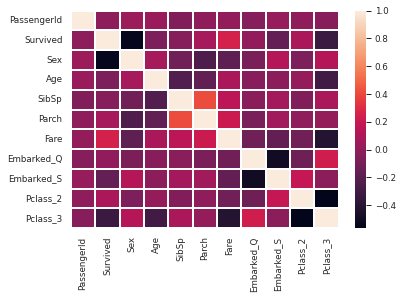

In [28]:
sns.set(context='paper', style='whitegrid', palette='muted', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.heatmap(corr,linewidths=1)

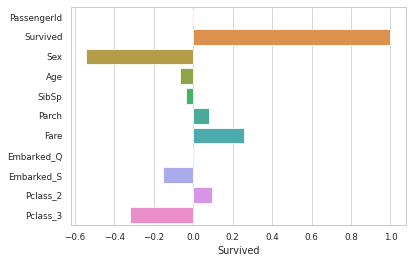

In [29]:
sns.barplot(x=corr.Survived,y=corr.columns)

In [30]:

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier

LR=LogisticRegression(solver='liblinear')
sgdcls=SGDClassifier()
nbcls=GaussianNB()
knn=KNeighborsClassifier()
desclr=DecisionTreeClassifier()
svc=SVC()
ada=AdaBoostClassifier()


In [31]:

X=train_df.drop('Survived',axis=1)
y=train_df['Survived']
from sklearn.model_selection import train_test_split
X_train, X_df_test, y_train, y_df_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
#LogisticRegression
LR.fit(X_train,y_train)
prediction=LR.predict(X_df_test)
score=cross_val_score(LR,X_train,y_train,cv=5)
print("Score:",score)
log_acc = round(LR.score(X_train,y_train) * 100, 2)
log_acc

Score: [0.8041958  0.82517483 0.79577465 0.74647887 0.83802817]


81.04

In [34]:
#SGDClassifier
sgdcls.fit(X_train,y_train)
prediction_sgdcls=sgdcls.predict(X_df_test)
score=cross_val_score(sgdcls,X_train,y_train,cv=5)
print("Score:",score)
sgdcls_acc = round(sgdcls.score(X_train,y_train) * 100, 2)
sgdcls_acc

Score: [0.60839161 0.64335664 0.62676056 0.38028169 0.63380282]


66.57

In [36]:
#GaussianNB
nbcls.fit(X_train,y_train)
prediction_nbcls=nbcls.predict(X_df_test)
score=cross_val_score(nbcls,X_train,y_train,cv=5)
print("Score:",score)
nbcls_acc = round(nbcls.score(X_train,y_train) * 100, 2)
nbcls_acc

Score: [0.78321678 0.81818182 0.81690141 0.73239437 0.76760563]


80.34

In [37]:
#KNeighborsClassifier
knn.fit(X_train,y_train)
prediction_knn=knn.predict(X_df_test)
score=cross_val_score(knn,X_train,y_train,cv=5)
print("Score:",score)
knn_acc = round(knn.score(X_train,y_train) * 100, 2)
knn_acc

Score: [0.65734266 0.61538462 0.58450704 0.58450704 0.64788732]


75.14

In [38]:

#DecisionTreeClassifier
desclr.fit(X_train,y_train)
prediction_desclr=desclr.predict(X_df_test)
score=cross_val_score(desclr,X_train,y_train,cv=5)
print("Score:",score)
desclr_acc = round(desclr.score(X_train,y_train) * 100, 2)
desclr_acc

Score: [0.76223776 0.72027972 0.72535211 0.75352113 0.76056338]


100.0

In [39]:
#SVC
svc.fit(X_train,y_train)
prediction_svc=svc.predict(X_df_test)
score=cross_val_score(svc,X_train,y_train,cv=5)
print("Score:",score)
svc_acc = round(svc.score(X_train,y_train) * 100, 2)
svc_acc

Score: [0.65734266 0.64335664 0.66197183 0.62676056 0.64084507]


65.03

In [40]:
#AdaBoostClassifier
ada.fit(X_train,y_train)
prediction_svc=ada.predict(X_df_test)
score=cross_val_score(ada,X_train,y_train,cv=5)
print("Score:",score)
ada_acc = round(ada.score(X_train,y_train) * 100, 2)
ada_acc

Score: [0.79020979 0.7972028  0.8028169  0.78873239 0.75352113]


83.85

In [41]:
prediction_test=LR.predict(test_df)

In [42]:
y_latest = train_df['Survived']
X_latest = train_df.drop('Survived', axis = 1)
X_latest = train_df.drop('SibSp', axis = 1)

In [44]:

ada.fit(X_latest,y_latest)
prediction_svc=ada.predict(X_df_test)
score=cross_val_score(ada,X_latest,y_latest,cv=5)
print("Score:",score)
acc_log_ada = round(ada.score(X_latest,y_latest) * 100, 2)
acc_log_ada

Score: [1. 1. 1. 1. 1.]


100.0